In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Check for missing values
print(df.isnull().sum())

# Optional: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('MedHouseVal', axis=1))


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = X_scaled
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


MAE: 0.533
MSE: 0.556
RMSE: 0.746
R² Score: 0.576


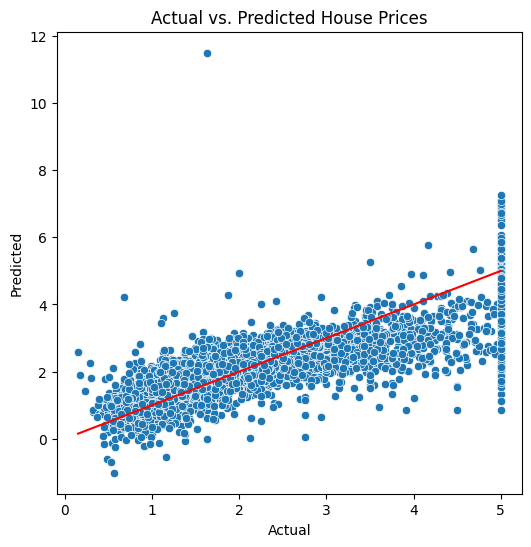

In [5]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


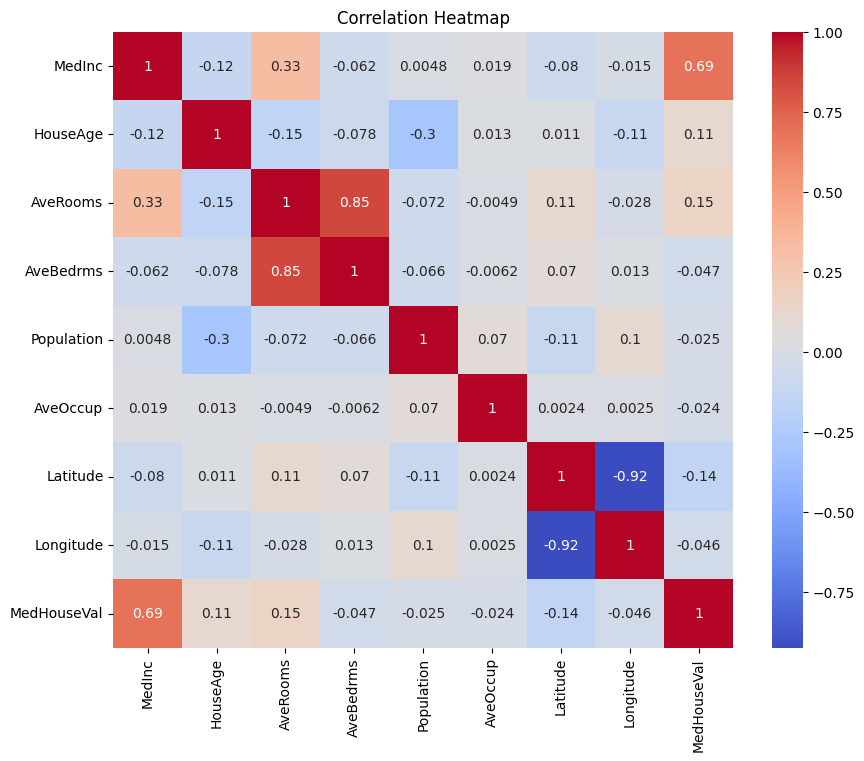

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


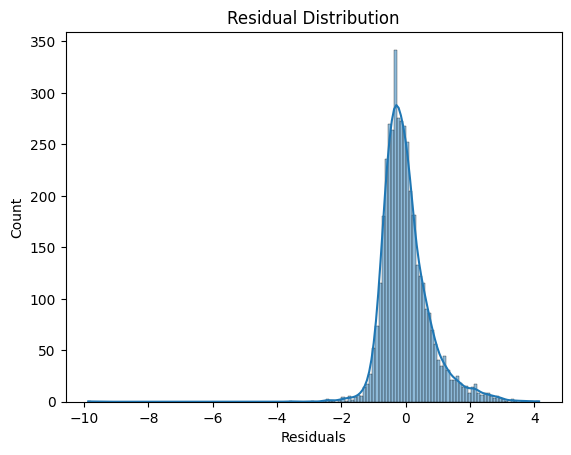

In [7]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


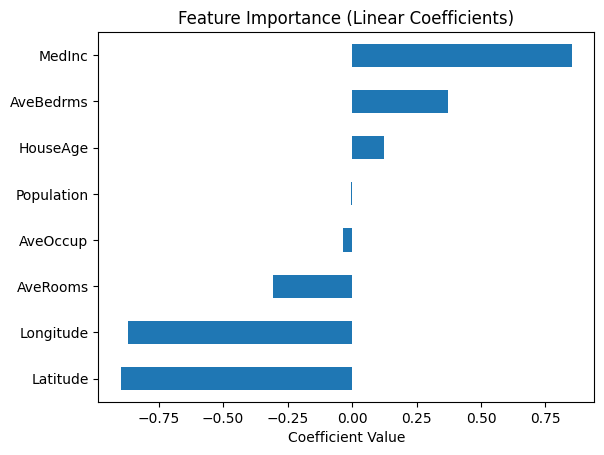

In [8]:
coeffs = pd.Series(model.coef_, index=data.feature_names)
coeffs.sort_values().plot(kind='barh', title='Feature Importance (Linear Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()


# 💡 Bonus (Optional)

In [9]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))


Ridge R²: 0.5758185345441327
Lasso R²: 0.4814202815313765


In [11]:
from sklearn.linear_model import Ridge, Lasso

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_r2 = lr_model.score(X_test, y_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_r2 = ridge_model.score(X_test, y_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_r2 = lasso_model.score(X_test, y_test)

print(f"Linear Regression R² Score: {lr_r2:.3f}")
print(f"Ridge Regression R² Score: {ridge_r2:.3f}")
print(f"Lasso Regression R² Score: {lasso_r2:.3f}")


Linear Regression R² Score: 0.576
Ridge Regression R² Score: 0.576
Lasso Regression R² Score: 0.481


In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores for Linear Regression
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average CV R² Score: {cv_scores.mean():.3f}")


Cross-Validation R² Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Average CV R² Score: 0.553


In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load the saved model
model = joblib.load('linear_model.pkl')

st.title('🏡 House Price Prediction App (California Housing)')

# User inputs
MedInc = st.number_input('Median Income', value=5.0)
HouseAge = st.number_input('House Age', value=20)
AveRooms = st.number_input('Average Rooms', value=5)
AveBedrms = st.number_input('Average Bedrooms', value=1)
Population = st.number_input('Population', value=1000)
AveOccup = st.number_input('Average Occupants', value=3)
Latitude = st.number_input('Latitude', value=34.0)
Longitude = st.number_input('Longitude', value=-118.0)

# Convert to array and predict
if st.button("Predict House Price"):
    features = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    prediction = model.predict(features)[0]
    st.success(f"🏠 Estimated House Price: ${prediction * 100000:.2f}")
